In [1]:
#Initial imports 
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Imports for better visualization

from collections import defaultdict
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (14, 6)
rcParams['figure.dpi'] = 250
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 25
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [4]:
#Show all the columns 
pd.set_option('display.max_columns',None)

In [5]:
#Reading in all the data from different datasets 
demog = pd.read_excel('exl_data.xlsx',sheetname='Demographic Data')
fpayda = pd.read_excel('exl_data.xlsx',sheetname='Payments Data')
defda = pd.read_excel('exl_data.xlsx',sheetname='Defaults data')
usepa = pd.read_excel('exl_data.xlsx',sheetname='Use Pattern')
datdi = pd.read_excel('exl_data.xlsx',sheetname='Data Dictionary')
appen = pd.read_excel('exl_data.xlsx',sheetname='Appendix')






In [6]:
#Seeing in all the data shapes
demog.shape
cacen.shape
payda.shape
defda.shape
usepa.shape
datdi.shape
appen.shape

(14952, 15)

(12674, 3)

(40444, 4)

(2471, 3)

(41730, 5)

(29, 4)

(45, 3)

In [7]:
#Seeing all the dataheads
demog.head()
cacen.head()
payda.head()
defda.head()
usepa.head()
datdi.head()
appen.head()

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Zone,Equipsale,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5.0,0.0,17.0,2015-04-03,NaN
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7.0,0.0,22.0,2015-04-03,NaN
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1.0,5.0,17.0,2016-04-03,NaN
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6.0,14.0,22.0,2015-04-03,NaN
4,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,NaN,NaN,NaN,2016-01-03,NaN


,Account Number,Query Date,Full Statement of the Enquiry
0,M2,2015-03-12,FDAEDBG!-Initial LevelPayment Settlement-Accou...
1,M2,2015-03-15,FDA!CEGD-Initial LevelTech-Operational Capabil...
2,M2,2015-03-25,FDCE#GHA-Initial LevelTech-Operational Capabil...
3,M2,2015-03-28,FDC#FAAD-Initial LevelPayment Settlement-Opera...
4,M2,2015-03-29,FDC!HGF#-Initial LevelPayment Settlement-Accou...


,Account Number,Realization Date,Sum,Mode
0,M1,2015-03-01,1209.810,Card II TYPE
1,M1,2015-02-01,1209.810,Card II TYPE
2,M1,2015-01-01,1209.810,Card II TYPE
3,M2,2015-03-01,751.695,Card II TYPE
4,M2,2015-02-01,751.695,Card II TYPE


,Account Number,date of default,Default sum
0,M100,2015-02-25,1037.2
1,M104,2015-03-13,611.8
2,M114,2015-03-07,2193.5
3,M125,2015-03-02,507.8
4,M132,2015-02-27,1405.5


,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,YYYYMM
0,M1,717.90,0,43.80,201501
1,M1,662.42,0,110.35,201502
2,M1,634.68,0,109.10,201503
3,M2,696.12,5,98.40,201501
4,M2,652.40,0,70.90,201502


,File,Variable,Variable Definition,Type
0,Demography data,Account Number,Unique key,Char
1,NaN,Status,"Closed, Open",Char
2,NaN,Commence Date,Date when Connection was installed,Char
3,NaN,Scheme,Service plan that the customer currently uses,Char
4,NaN,Address,Valid/Invalid,Char


,Variable,Codes,Unnamed: 2
0,Salary Slab,1,Very Low Salary bracket
1,NaN,2,Very Low Salary bracket
2,NaN,3,Very Low Salary bracket
3,NaN,4,Low Salary Bracket
4,NaN,5,Low Salary Bracket


In [8]:
#Seeing the datatype and summary in next few commands and check for null values
demog.info()
demog.describe()
demog.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 15 columns):
Account Number                    14952 non-null object
Commence Date                     14947 non-null datetime64[ns]
Address                           14549 non-null object
Scheme                            14952 non-null object
Staus                             14952 non-null object
Gender                            12913 non-null object
Zone                              14952 non-null object
Equipsale                         14952 non-null object
Age                               11992 non-null float64
Equipment Warranty                14320 non-null object
Salary Slab                       12944 non-null float64
Professional Info                 12944 non-null float64
Age of Home                       12944 non-null float64
Equipment Warranty Expiry Date    14320 non-null datetime64[ns]
Churn Date                        506 non-null object
dtypes: datetime64[ns](2), float6

,Age,Salary Slab,Professional Info,Age of Home
count,11992.000000,12944.000000,12944.000000,12944.000000
mean,50.193879,4.459672,3.535847,14.044036
std,14.107236,1.909911,5.684005,7.190689
min,14.000000,1.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,98.000000,13.000000,20.000000,22.000000


Account Number                        0
Commence Date                         5
Address                             403
Scheme                                0
Staus                                 0
Gender                             2039
Zone                                  0
Equipsale                             0
Age                                2960
Equipment Warranty                  632
Salary Slab                        2008
Professional Info                  2008
Age of Home                        2008
Equipment Warranty Expiry Date      632
Churn Date                        14446
dtype: int64

In [9]:
#Seeing the datatype and summary in next few commands and check for null values
cacen.info()
cacen.describe()
cacen.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12674 entries, 0 to 12673
Data columns (total 3 columns):
Account Number                   12674 non-null object
Query Date                       12674 non-null datetime64[ns]
Full Statement of the Enquiry    12674 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 297.1+ KB


,Account Number,Query Date,Full Statement of the Enquiry
count,12674,12674,12674
unique,5463,178,12636
top,M2162,2015-01-25 00:00:00,BAADCAAAA-Initial LevelTech-Operational Capabi...
freq,47,145,6
first,NaN,2015-01-01 00:00:00,NaN
last,NaN,2015-07-30 00:00:00,NaN


Account Number                   0
Query Date                       0
Full Statement of the Enquiry    0
dtype: int64

In [10]:
#Seeing the datatype and summary in next few commands and check for null values
payda.info()
payda.describe()
payda.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40444 entries, 0 to 40443
Data columns (total 4 columns):
Account Number      40444 non-null object
Realization Date    40444 non-null datetime64[ns]
Sum                 40444 non-null float64
Mode                40444 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.2+ MB


,Sum
count,40444.00000
mean,842.65590
std,448.71654
min,0.10500
25%,648.27000
50%,769.12500
75%,958.96500
max,23261.91000


Account Number      0
Realization Date    0
Sum                 0
Mode                0
dtype: int64

In [11]:
#Seeing the datatype and summary in next few commands and check for null values
defda.info()
defda.describe()
defda.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 3 columns):
Account Number     2471 non-null object
date of default    2471 non-null datetime64[ns]
Default sum        2471 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 58.0+ KB


,Default sum
count,2471.000000
mean,803.314690
std,1086.605933
min,12.200000
25%,519.900000
50%,654.300000
75%,881.300000
max,28660.400000


Account Number     0
date of default    0
Default sum        0
dtype: int64

In [12]:
#Seeing the datatype and summary in next few commands and check for null values
usepa.info()
usepa.describe()
usepa.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41730 entries, 0 to 41729
Data columns (total 5 columns):
Account Number                         41730 non-null object
Used pattern in hours                  41730 non-null float64
Usage Post Limit Utilization in hrs    41730 non-null int64
data used Gb                           41730 non-null float64
YYYYMM                                 41730 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.6+ MB


,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,YYYYMM
count,41730.000000,41730.000000,41730.000000,41730.000000
mean,627.074917,58.375246,103.578622,201503.364246
std,136.673401,114.049965,117.736045,2.057045
min,1.020000,0.000000,0.000000,201501.000000
25%,593.022500,0.000000,34.050000,201502.000000
50%,662.525000,0.000000,72.950000,201503.000000
75%,717.300000,57.000000,131.650000,201505.000000
max,1390.770000,706.000000,2726.450000,201507.000000


Account Number                         0
Used pattern in hours                  0
Usage Post Limit Utilization in hrs    0
data used Gb                           0
YYYYMM                                 0
dtype: int64

In [13]:
demog.head()

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Zone,Equipsale,Age,Equipment Warranty,Salary Slab,Professional Info,Age of Home,Equipment Warranty Expiry Date,Churn Date
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5.0,0.0,17.0,2015-04-03,NaN
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7.0,0.0,22.0,2015-04-03,NaN
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1.0,5.0,17.0,2016-04-03,NaN
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6.0,14.0,22.0,2015-04-03,NaN
4,M5,2015-01-18,VALID,PRP,Open,NaN,Western,RENTED,NaN,Full Year,NaN,NaN,NaN,2016-01-03,NaN


# UNIVARIATE ANALYSIS

In [14]:
#Highly imbalanced type of data here in counts
demog['Address'].value_counts()
demog['Scheme'].value_counts()
demog['Staus'].value_counts()
demog['Gender'].value_counts()
demog['Age'].value_counts()
demog['Equipment Warranty'].value_counts()
demog['Salary Slab'].value_counts()
demog['Professional Info'].value_counts()





VALID      13599
INVALID      950
Name: Address, dtype: int64

PPL    2993
PWR    2615
KLA    1508
PRM    1397
CNN    1268
CHC    1172
PRP     745
POP     682
PRR     651
PMM     613
MXX     459
PWM     406
PWP     201
ESS     165
PRS      77
Name: Scheme, dtype: int64

Open      14384
Closed      568
Name: Staus, dtype: int64

Male      6956
Female    5957
Name: Gender, dtype: int64

49.0    352
56.0    347
47.0    336
50.0    326
58.0    319
51.0    319
59.0    312
53.0    311
48.0    310
55.0    309
57.0    304
61.0    303
63.0    302
52.0    301
54.0    300
46.0    296
62.0    291
60.0    281
42.0    263
44.0    259
39.0    258
45.0    256
40.0    255
41.0    246
64.0    245
43.0    242
38.0    230
36.0    193
67.0    191
66.0    185
       ... 
77.0     55
75.0     54
78.0     51
76.0     50
79.0     35
80.0     34
81.0     33
18.0     31
19.0     31
82.0     26
85.0     22
83.0     16
16.0     15
84.0     15
88.0     14
15.0     10
17.0     10
89.0     10
86.0     10
87.0      9
91.0      6
14.0      3
92.0      3
93.0      3
95.0      3
96.0      3
97.0      1
90.0      1
94.0      1
98.0      1
Name: Age, dtype: int64

Three Full Years           14260
Full Year Plus 3 Months       44
Full Year                     16
Name: Equipment Warranty, dtype: int64

3.0     3023
4.0     2928
6.0     2202
5.0     1904
7.0      777
2.0      689
1.0      679
8.0      328
9.0      246
10.0      82
13.0      47
11.0      20
12.0      19
Name: Salary Slab, dtype: int64

0.0     8505
5.0     1093
14.0     887
6.0      554
10.0     521
20.0     355
13.0     264
9.0      221
8.0      198
19.0     115
18.0     105
12.0      59
2.0       33
7.0       17
17.0      13
15.0       2
16.0       1
11.0       1
Name: Professional Info, dtype: int64

In [15]:
#Changed 'Region' to 'Zone' in original file
demog['Zone'].value_counts()


Northern    6546
Eastern     6240
Western     1803
Southern     363
Name: Zone, dtype: int64

In [16]:
#Changed 'Sale Equipment Status' to 'Equipsale'
demog['Equipsale'].value_counts()

RENTED         13384
BOUGHT          1497
Second Hand       67
Unknown            4
Name: Equipsale, dtype: int64

Visualisation for missing value filling and hypothesis testing 

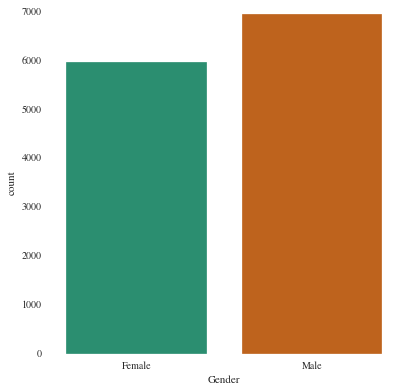

In [17]:
sns.factorplot('Gender',data=demog,kind ="count",size=6)
#Can't use mode for data imputation as both the classes have similar proportion

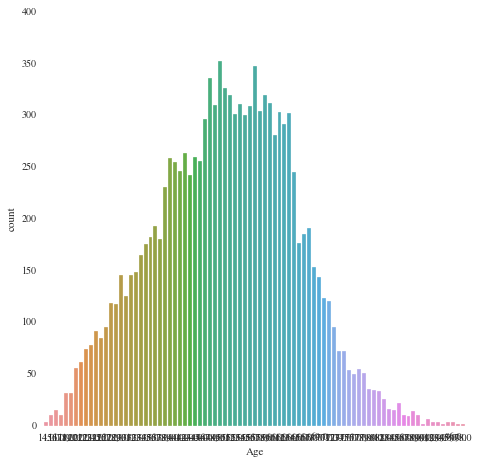

In [19]:
sns.factorplot('Age',data=demog,kind ="count",size=7)

In [21]:
demog['Age'].mode()
demog['Age'].mean()
demog['Age'].median()

0    49.0
dtype: float64

50.193879252835224

51.0

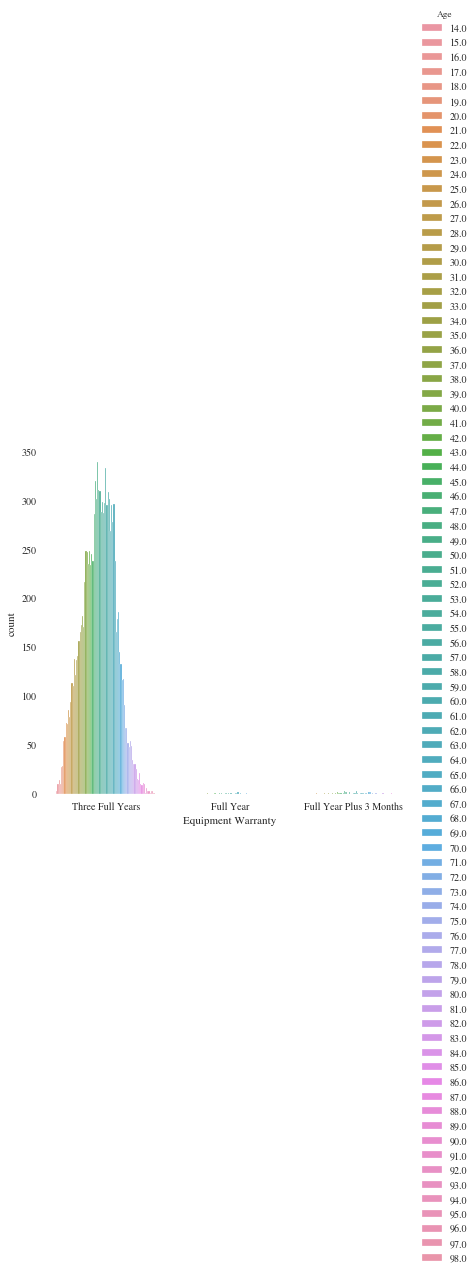

In [30]:
sns.factorplot('Equipment Warranty',data=demog,kind ="count",size=6,hue='Age')

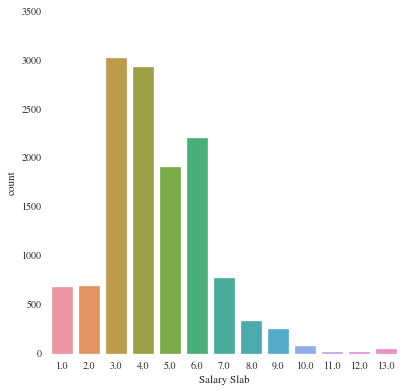

In [32]:
sns.factorplot('Salary Slab',data=demog,kind ="count",size=6)
#Some right skewness observed with a fatter tail on left

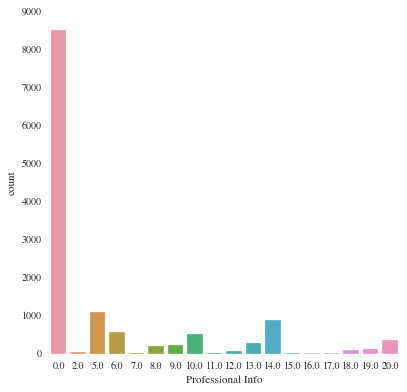

In [24]:
sns.factorplot('Professional Info',data=demog,kind ="count",size=6)

Professional info seems to have more than 10500(8500+2000) missing values

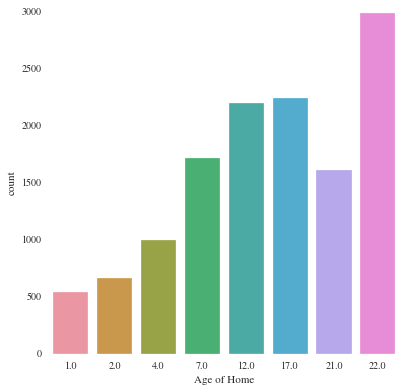

In [34]:
sns.factorplot('Age of Home',data=demog,kind ="count",size=6)


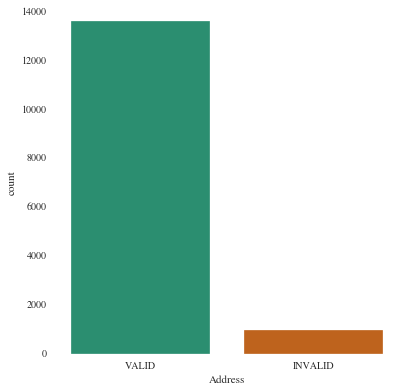

In [36]:
sns.factorplot('Address',data=demog,kind ="count",size=6)


In [27]:
demog['Scheme'].value_counts()

PPL    2993
PWR    2615
KLA    1508
PRM    1397
CNN    1268
CHC    1172
PRP     745
POP     682
PRR     651
PMM     613
MXX     459
PWM     406
PWP     201
ESS     165
PRS      77
Name: Scheme, dtype: int64

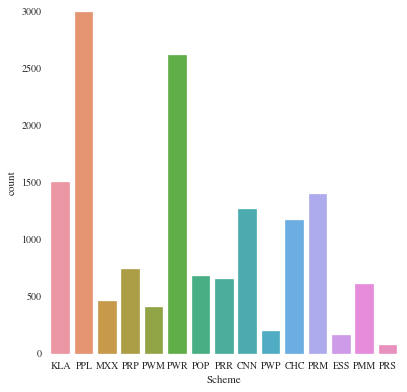

In [28]:
sns.factorplot('Scheme',data=demog,kind ="count",size=6)


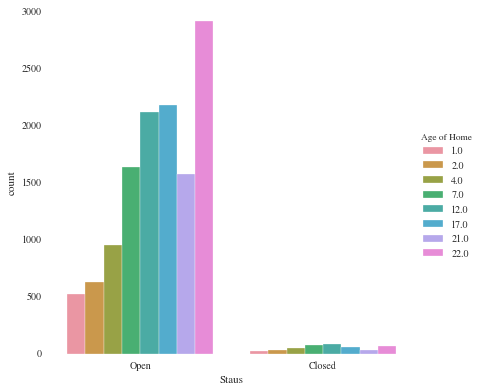

In [37]:
sns.factorplot(x='Staus',data=demog,kind ="count",size=6,hue="Age of Home")


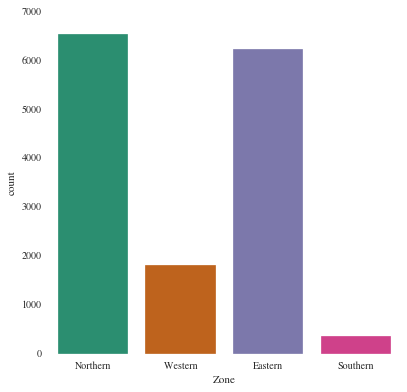

In [38]:
sns.factorplot('Zone',data=demog,kind ="count",size=6)

In [ ]:
sns.factorplot('Equipsale',data=demog,kind ="count",size=6)

In [ ]:
sns.factorplot('Gender',data= demog,hue='Scheme',kind= "count",size=8)

In [ ]:
demog.shape[0]

In [ ]:
demog.head(59)